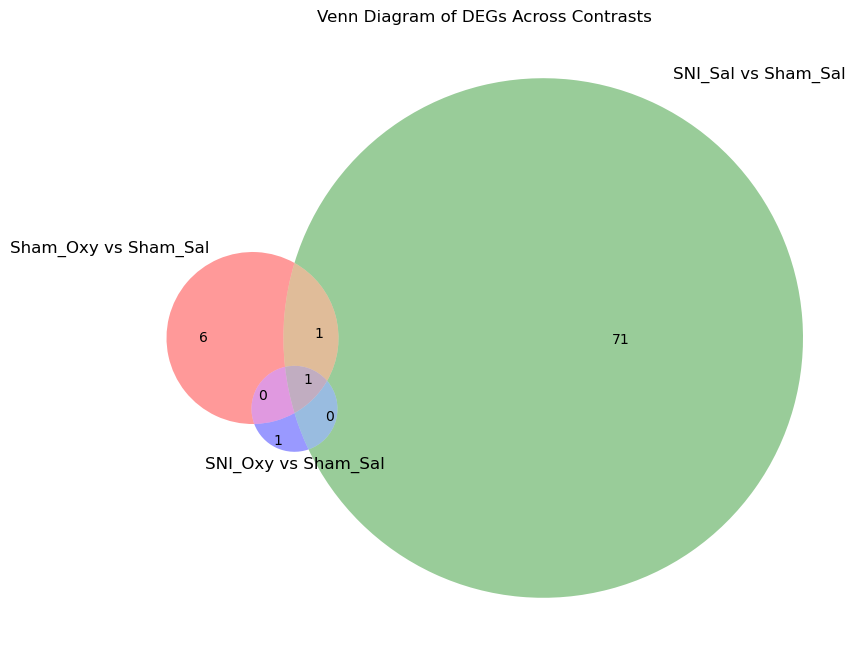

In [30]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import os

# Define the relative path to the directory containing your files
relative_path = 'differentialabundance_results/tables/differential/'

# Load filtered results for each contrast using the relative path
sham_oxy_vs_sham_sal = pd.read_csv(os.path.join(relative_path, 'Sham_oxy_vs_Sham_Sal.deseq2.results_filtered.tsv'), sep='\t')
sni_sal_vs_sham_sal = pd.read_csv(os.path.join(relative_path, 'SNI_vs_Sham_Sal.deseq2.results_filtered.tsv'), sep='\t')
sni_oxy_vs_sham_sal = pd.read_csv(os.path.join(relative_path, 'SNI_oxy_vs_Sham_Sal.deseq2.results_filtered.tsv'), sep='\t')

# Set the threshold for significance
threshold = 0.05

# Extract gene sets based on the adjusted p-value
sham_oxy_genes = set(sham_oxy_vs_sham_sal[sham_oxy_vs_sham_sal['padj'] < threshold]['gene_id'])
sni_sal_genes = set(sni_sal_vs_sham_sal[sni_sal_vs_sham_sal['padj'] < threshold]['gene_id'])
sni_oxy_genes = set(sni_oxy_vs_sham_sal[sni_oxy_vs_sham_sal['padj'] < threshold]['gene_id'])

# Create the Venn diagram
plt.figure(figsize=(10, 8))
venn3(
    [sham_oxy_genes, sni_sal_genes, sni_oxy_genes],
    set_labels=('Sham_Oxy vs Sham_Sal', 'SNI_Sal vs Sham_Sal', 'SNI_Oxy vs Sham_Sal')
)
plt.title("Venn Diagram of DEGs Across Contrasts")
plt.show()


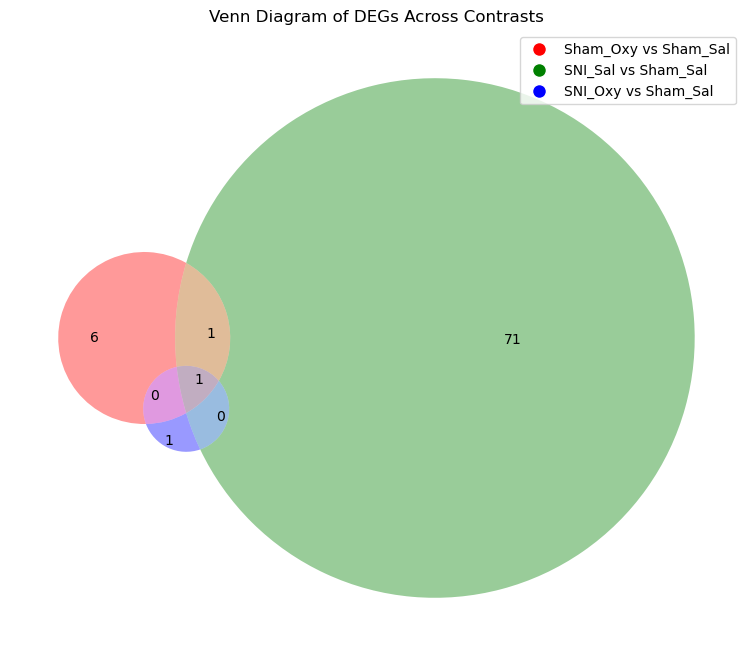

In [39]:
# Define the relative path to the directory containing your files
relative_path = 'differentialabundance_results/tables/differential/'

# Load filtered results for each contrast
sham_oxy_vs_sham_sal = pd.read_csv(os.path.join(relative_path, 'Sham_oxy_vs_Sham_Sal.deseq2.results_filtered.tsv'), sep='\t')
sni_sal_vs_sham_sal = pd.read_csv(os.path.join(relative_path, 'SNI_vs_Sham_Sal.deseq2.results_filtered.tsv'), sep='\t')
sni_oxy_vs_sham_sal = pd.read_csv(os.path.join(relative_path, 'SNI_oxy_vs_Sham_Sal.deseq2.results_filtered.tsv'), sep='\t')

# Extract gene sets from each file
sham_oxy_genes = set(sham_oxy_vs_sham_sal['gene_id'])  # Extract gene_ids from Sham_Oxy vs Sham_Sal
sni_sal_genes = set(sni_sal_vs_sham_sal['gene_id'])     # Extract gene_ids from SNI_Sal vs Sham_Sal
sni_oxy_genes = set(sni_oxy_vs_sham_sal['gene_id'])     # Extract gene_ids from SNI_Oxy vs Sham_Sal

# Create the Venn diagram
plt.figure(figsize=(10, 8))
venn_diagram = venn3(
    [sham_oxy_genes, sni_sal_genes, sni_oxy_genes],
    set_labels=('', '', ''), 
    set_colors=("r", "g", "b") # Explicitly define colors
)

# Set the labels for the legend manually, matching the defined colors
labels = ['Sham_Oxy vs Sham_Sal', 'SNI_Sal vs Sham_Sal', 'SNI_Oxy vs Sham_Sal']
colors = ("r", "g", "b")

# Add a legend
plt.legend(
    [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors],
    labels,
    loc='upper right'
)

plt.title("Venn Diagram of DEGs Across Contrasts")
plt.show()